In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from statsmodels.tools.tools import add_constant

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
clm_reg = np.loadtxt('./modeling/clm_regressor.1D')
tlm_reg = np.loadtxt('./modeling/tlm_regressor.1D')

In [4]:
np.random.seed(42)
noise = np.random.normal(0,0.2,clm_reg.size)
raw = np.loadtxt('./modeling/data.1D') + noise

# 1. Condition Level Modeling (CLM) vs. Trial Level Modeling (TLM)

Consider the following raw timeseries data which contains 7 events. 

The peaks for 7 events are not very evident due to random noise in the data.

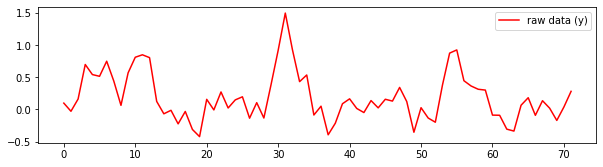

In [5]:
plt.figure(figsize=(10,2.5))
plt.plot(raw,color='red',label='raw data (y)')
plt.legend()

## 1.1. CLM

Conventional approach to model the responses is to specify a single regressor for a condition.

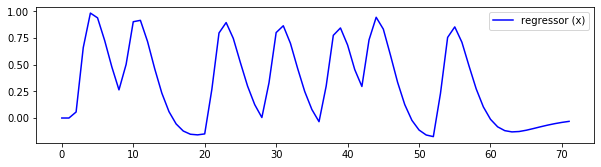

In [50]:
plt.figure(figsize=(10,2.5))
plt.plot(clm_reg,color='blue',label='regressor (x)')
plt.legend()

Notice all peaks have the same amplitude (= 1).

Now $x$ can be regressed on to the raw data ($y$) by running a simple linear regression model.

$$\hat{y^{(i)}} = \beta_{0} + \beta_{x}x^{(i)}$$

Where $\hat{y^{(i)}}$ is estimated response for the $i$th timepoint.


In [6]:
lm_clm = LinearRegression()
X_clm = add_constant(clm_reg)
lm_clm.fit(X_clm,raw)
y_hat_clm = lm_clm.predict(X_clm)

Following shows the estimated response ($\hat{y}$) overlaid in the raw data ($y$).

Notice the amplitude of all peaks in $\hat{y}$ is the same, however now scaled down to 0.64 from 1 (because it happens to provide the best average fit).  

The 0.64 is the scaling factor ($\beta_{x}$ in the equation above) for the regressor $x$.


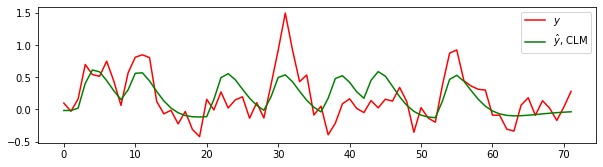

In [8]:
plt.figure(figsize=(10,2.5))
plt.plot(raw,color='red',label='$y$')
plt.plot(y_hat_clm,color='green',label=r'$\hat{y}$, CLM')
plt.legend()

## 1.2. TLM

Now lets model the response at trial level. Each event will be modele by a separate regressors.

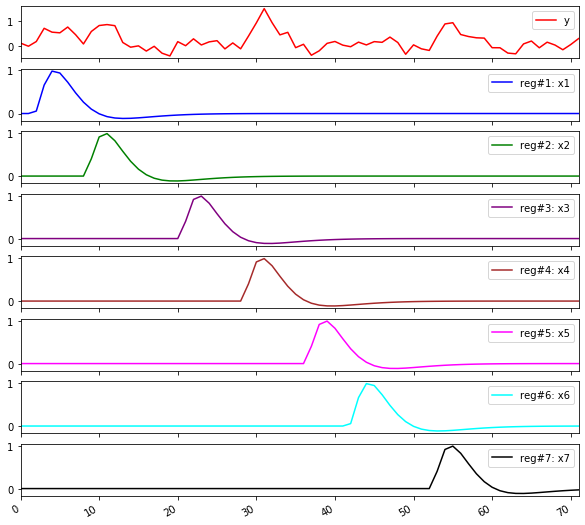

In [9]:
_=pd.DataFrame(np.hstack((raw[:,None],tlm_reg)),
               columns=['y']+['reg#%i: x%i' %(i,i) for i in range(1,8)]).plot(subplots=True,
                                                                       color=['red','blue','green','purple','brown','magenta','cyan','black'],
                                                                       figsize=(10,10))

Notice again, peaks of all 7 regressors have the same amplitude (= 1).

The $x_{k}$ (where $k$ = 1,2,..n; n is total number of regressors) can be regressed on to the raw data ($y$) by running a multiple linear regression model.

$$\hat{y^{(i)}} = \beta_{0} + \sum^{n}_{k = 1}{\beta_{x_{k}}x^{(i)}_{k}}$$

Where $\hat{y^{(i)}}$ is estimated response for $i$th timepoint.

In [10]:
lm_tlm = LinearRegression()
X_tlm = add_constant(tlm_reg)
lm_tlm.fit(X_tlm,raw)
y_hat_tlm = lm_tlm.predict(X_tlm)

Notice the peaks in $\hat{y}$ have acquired different amplitudes in order to approximate the raw data.  

That is, each regressor is now scaled by a different $\beta_{x_{k}}$, where k = 1,2,..,n.

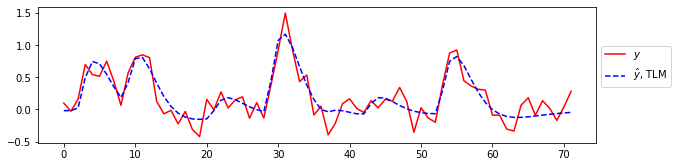

In [13]:
plt.figure(figsize=(10,2.5))
plt.plot(raw,color='red',label='$y$')
plt.plot(y_hat_tlm,color='blue',label=r'$\hat{y}$, TLM',linestyle='--')
plt.legend(loc='upper left',bbox_to_anchor=[1,0.75])

## 1.3. Visualize fits from both methods

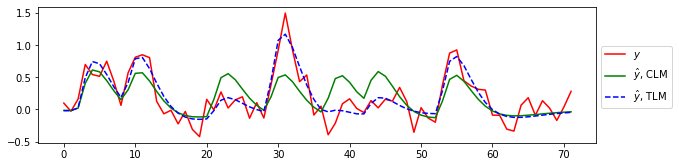

In [12]:
plt.figure(figsize=(10,2.5))
plt.plot(raw,color='red',label='$y$')
plt.plot(y_hat_clm,color='green',label=r'$\hat{y}$, CLM')
plt.plot(y_hat_tlm,color='blue',label=r'$\hat{y}$, TLM',linestyle='--')
plt.legend(loc='upper left',bbox_to_anchor=[1,0.75])